In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
import requests

url = "https://api.massive.com/v2/aggs/ticker/AAPL/range/1/day/2025-09-01/2026-01-01?adjusted=true&sort=asc&limit=120&apiKey=SqeuOB4c0nVrbgcCH2nIjMYCQQpvcOpu"    # Daha önce bulduğunuz URL ile değiştirin
api_data = requests.get(url).json()

In [3]:
apple_df = pd.DataFrame(api_data["results"])

In [41]:
apple_df.head()

,volume,avg_price,open,close,high,low,date,nb_trades
date,,,,,,,,
2025-09-02 04:00:00,44075638.0,229.9932,229.250,229.72,230.8500,226.9700,2025-09-02 04:00:00,598029
2025-09-03 04:00:00,66427835.0,237.0292,237.210,238.47,238.8500,234.3600,2025-09-03 04:00:00,898535
2025-09-04 04:00:00,47549429.0,238.5031,238.450,239.78,239.8999,236.7400,2025-09-04 04:00:00,541770
2025-09-05 04:00:00,54870397.0,239.6771,239.995,239.69,241.3200,238.4901,2025-09-05 04:00:00,610786
2025-09-08 04:00:00,48999495.0,238.2065,239.300,237.88,240.1500,236.3400,2025-09-08 04:00:00,563611


In [26]:
apple_df.columns

Index(['volume', 'VWAP', 'open', 'close', 'high', 'low', 'date', 'nb_trades'], dtype='object')

In [8]:
apple_df.shape

(85, 8)

In [29]:
apple_df["date"] = pd.to_datetime(apple_df["date"], unit="ms")

In [16]:
apple_df = apple_df.set_index("date")
apple_df = apple_df.sort_index()

In [40]:
apple_df = apple_df.rename(columns={
    "o": "open",
    "c": "close",
    "h": "high",
    "l": "low",
    "t": "date",
    "v": "volume",
    "n": "nb_trades",
    "VWAP": "avg_price"
})

<Axes: xlabel='date'>

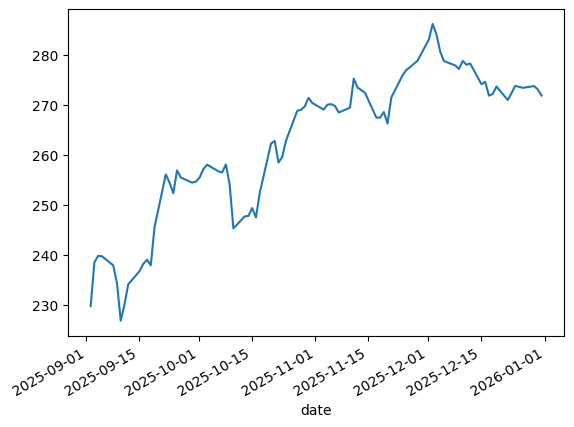

In [42]:
apple_df["close"].plot()

<Axes: xlabel='date'>

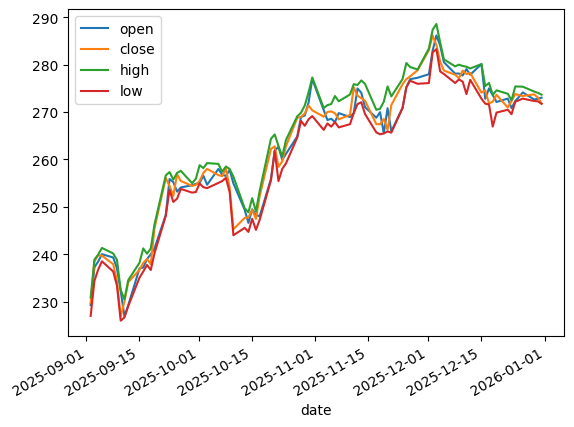

In [43]:
apple_df[['open', 'close', 'high', 'low']].plot()

<Axes: xlabel='date'>

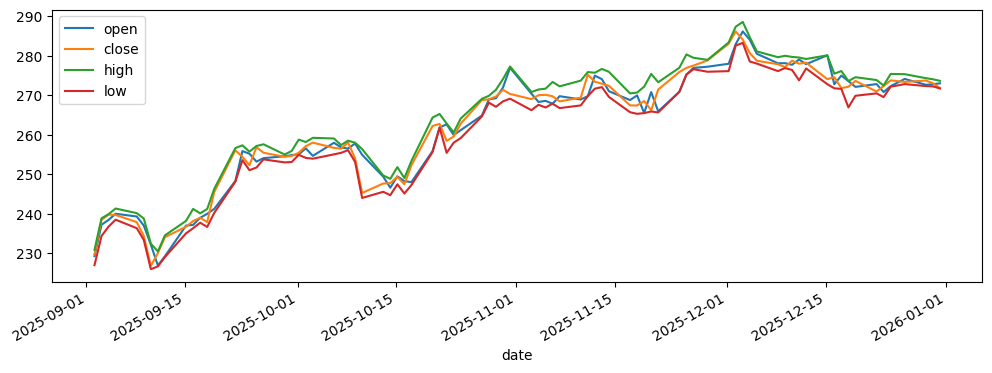

In [48]:
apple_df[['open', 'close', 'high', 'low']].plot(figsize=(12,4))

In [50]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())